<a href="https://colab.research.google.com/github/shivihub/Bootstrap-assignment/blob/master/Lab3_QAM_programmingg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**M-ARY QAM**

Text(0, 0.5, 'Quadrature')

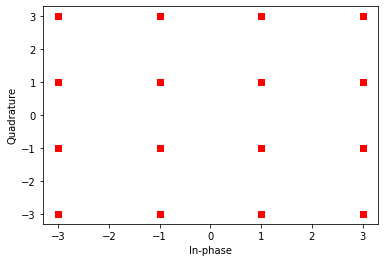

In [15]:
import numpy as np
from scipy import signal as sg
import matplotlib.pyplot as plt
k = 4 # Modulation order
num_s = 1024 # Number of symbols
bit_tx = np.random.randint(2, size=num_s*k)
if k%2 == 0:
  k1 = k/2
else:
  k1 = k/2 + 0.5
k1 = round(k1)
k2 = k-k1
I = 0
Q = 0
for i in range(k1):
  I = I +2*pow(2,i)*bit_tx[i::k]
I = I -(pow(2,k1)-1)
for i in range(k2):
  Q = Q +2*pow(2,i)*bit_tx[(k1+i)::k]
Q = Q -(pow(2,k2)-1)
plt.plot(I, Q, 'rs')
plt.xlabel('In-phase')
plt.ylabel('Quadrature')

In [14]:
n_v = (np.random.normal(0,1,size=num_s) +1j*np.random.normal(0,1,size=num_s));
noise_power = (np.mean(np.abs(n_v**2)));
SNR_db = 20;
SNR = 10**(SNR_db/10)
signal_power = (np.mean(np.abs((I+1j*Q)**2)));
A = (signal_power/SNR*noise_power)
add_noise = A*n_v

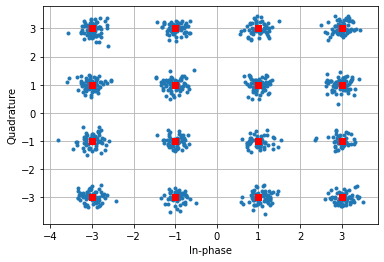

In [5]:
sign_rx = (I+1j*Q) + add_noise
# Ploting of constellation diagram
plt.plot(np.real(sign_rx), np.imag(sign_rx), '.')
plt.plot(I, Q, 'rs')
plt.xlabel('In-phase')
plt.ylabel('Quadrature')
plt.grid(True)
plt.show()

**16 QAM MODULATION AND DEMODULATION USING MAPPING TABLE**

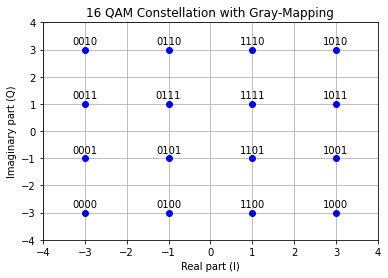

In [6]:
import numpy as np
import matplotlib.pyplot as plt

num_s = 1024 #Number of symbols
mod_order = 4 # For 16 QAM

num_bits = num_s*mod_order # Number of bits

mapping_table = {
  (0,0,0,0) : -3-3j,
  (0,0,0,1) : -3-1j,
  (0,0,1,0) : -3+3j,
  (0,0,1,1) : -3+1j,
  (0,1,0,0) : -1-3j,
  (0,1,0,1) : -1-1j,
  (0,1,1,0) : -1+3j,
  (0,1,1,1) : -1+1j,
  (1,0,0,0) : 3-3j,
  (1,0,0,1) : 3-1j,
  (1,0,1,0) : 3+3j,
  (1,0,1,1) : 3+1j,
  (1,1,0,0) : 1-3j,
  (1,1,0,1) : 1-1j,
  (1,1,1,0) : 1+3j,
  (1,1,1,1) : 1+1j
}
for b3 in [0, 1]:
  for b2 in [0, 1]:
    for b1 in [0, 1]:
      for b0 in [0, 1]:
        B = (b3, b2, b1, b0)
        Q = mapping_table[B]
        plt.plot(Q.real, Q.imag, 'bo')
        plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B),ha='center')
plt.grid(True)
plt.xlim((-4, 4)); plt.ylim((-4,4)); plt.xlabel('Real part (I)');
plt.ylabel('Imaginary part (Q)')
plt.title('16 QAM Constellation with Gray-Mapping');

In [7]:
# The demapping table is simply the inverse mapping of the mapping table
demapping_table = {v : k for k, v in mapping_table.items()}

# Bit generation
bits = np.random.binomial(n=1, p=0.5, size=(num_bits, ))
print ("Bits count: ", len(bits))
print ("First 20 bits: ", bits[:20])
print ("Mean of bits (should be around 0.5): ", np.mean(bits))

Bits count:  4096
First 20 bits:  [1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0]
Mean of bits (should be around 0.5):  0.501220703125


In [8]:
# Bit to symbol conversion
bits_SP = bits.reshape((num_s, mod_order))
print ("First 5 bit groups")
print (bits_SP[:5,:])

First 5 bit groups
[[1 1 1 1]
 [1 1 0 1]
 [0 1 1 1]
 [0 1 0 1]
 [0 1 1 0]]


In [9]:
# 16 QAM modulation using mapping table
def Mapping(bits):
  return np.array([mapping_table[tuple(b)] for b in bits])
QAM = Mapping(bits_SP)
print ("First 5 QAM symbols and bits:")
print (bits_SP[:5,:])
print (QAM[:5])

First 5 QAM symbols and bits:
[[1 1 1 1]
 [1 1 0 1]
 [0 1 1 1]
 [0 1 0 1]
 [0 1 1 0]]
[ 1.+1.j  1.-1.j -1.+1.j -1.-1.j -1.+3.j]


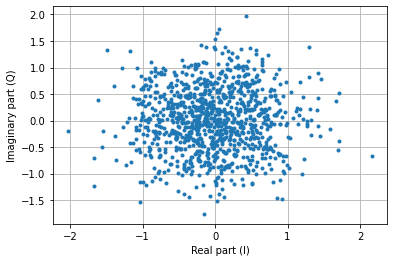

In [23]:
# AWGN channel creation
# Noise generation
# Complex Gaussian noise
n_v = (np.random.normal(0,1,size=num_s) + 1j*np.random.normal(0,1,size=num_s));
noise_power = (np.mean(np.abs(n_v**2)));
SNR_db = 15; # Signal-to-noise ratio in dB
SNR = 10**(SNR_db/10)
signal_power = (np.mean(np.abs(QAM**2)));
A = (signal_power/SNR*noise_power)
add_noise = A*n_v

# Ploting of constellation diagram
plt.plot(np.real(add_noise), np.imag(add_noise), '.')
plt.xlabel('Real part (I)'); plt.ylabel('Imaginary part (Q)')
plt.grid(True)
plt.show()

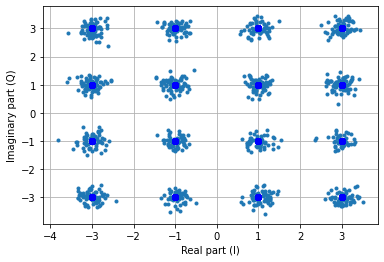

In [11]:
QAM_rx = QAM + add_noise # Received Signal
# Ploting of constalation diagram
plt.plot(np.real(sign_rx), np.imag(sign_rx), '.')
plt.plot(np.real(QAM), np.imag(QAM), 'bo')

plt.xlabel('Real part (I)'); plt.ylabel('Imaginary part (Q)')
plt.grid(True)
plt.show()

In [12]:
def Demapping(QAM):
# array of possible constellation points
  constellation = np.array([x for x in demapping_table.keys()])

# calculate distance of each RX point to each possible point
  dists = abs(QAM.reshape((-1,1)) - constellation.reshape((1,-1)))

# for each element in QAM, choose the index in constellation
# that belongs to the nearest constellation point
  const_index = dists.argmin(axis=1)

# get back the real constellation point
  hardDecision = constellation[const_index]

# transform the constellation point into the bit groups
  return np.vstack([demapping_table[C] for C in hardDecision]),hardDecision
  
bits_SP_est, hardDecision = Demapping(QAM_rx)
bits_est = bits_SP_est.reshape((-1,))
print ("Obtained Bit error rate: ", np.sum(abs(bits-bits_est))/len(bits))

Obtained Bit error rate:  0.042724609375
